 
 <h1> Machine Learning 1 : Exam Project </h1>
 <h3> Professor : Walter Daelemans </h3>
 <h3> University of Antwerp, January 2021 </h3>
 <h3> Vasiliki Zafeiropoulou - Student number : 20204984 </h3>

In [83]:
#Importing all necessary modules
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Reading and preprocessing our data ##

In [84]:
os.chdir('C:/Users/vasil/Desktop/bootcamp/Machine Learning/WorldHappiness')
# Reading the csv files. Since there are multiple happiness data for each year, I want to create a csv file with combined 
# data for years 2015-16.

d2015 = pd.read_csv('2015.csv') #Read the files
d2016 = pd.read_csv('2016.csv')

#Inspect the files
print(len(d2015)) #So we see that there is one extra. 
print(len(d2016))
d2015.columns


158
157


Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [85]:
d2015.head()
d2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [86]:
y = d2016.filter(['Country', 'Happiness Score']) 
x = d2015.drop(columns=['Standard Error', 'Happiness Rank', 'Dystopia Residual'] )

df = x.merge(y, on = 'Country') #I merge the two tables into one based on the Country name, making sure that only 
                                #scores for countries that exist in both tables are used.
happiness = df.rename( columns = {'Happiness Score_x': 'Happiness_Score_2015','Happiness Score_y':'Happiness_Score_2016'})
happiness.isnull().sum() #no empty values so we move on = df.Sex.apply(lambda x: 1 if x == 'female' else 0)
happiness.info()
happiness.describe()
happiness.head() #everything seems to be okay



<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 150
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        151 non-null    object 
 1   Region                         151 non-null    object 
 2   Happiness_Score_2015           151 non-null    float64
 3   Economy (GDP per Capita)       151 non-null    float64
 4   Family                         151 non-null    float64
 5   Health (Life Expectancy)       151 non-null    float64
 6   Freedom                        151 non-null    float64
 7   Trust (Government Corruption)  151 non-null    float64
 8   Generosity                     151 non-null    float64
 9   Happiness_Score_2016           151 non-null    float64
dtypes: float64(8), object(2)
memory usage: 13.0+ KB


,Country,Region,Happiness_Score_2015,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness_Score_2016
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.509
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.501
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.526
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.498
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.404


In [87]:
happiness.Happiness_Score_2015= happiness.Happiness_Score_2015.astype(int)
happiness.Happiness_Score_2016 = happiness.Happiness_Score_2016.astype(int)
happiness.head()
print(happiness.describe())
print(happiness.shape)


       Happiness_Score_2015  Economy (GDP per Capita)      Family  \
count            151.000000                151.000000  151.000000   
mean               4.841060                  0.863919    0.998806   
std                1.194949                  0.393220    0.264277   
min                2.000000                  0.000000    0.139950   
25%                4.000000                  0.593865    0.858015   
50%                5.000000                  0.920490    1.032760   
75%                6.000000                  1.164410    1.221780   
max                7.000000                  1.690420    1.402230   

       Health (Life Expectancy)     Freedom  Trust (Government Corruption)  \
count                151.000000  151.000000                     151.000000   
mean                   0.647063    0.428533                       0.140798   
std                    0.233719    0.152370                       0.119071   
min                    0.000000    0.000000                       

In [88]:
#Making this a classification problem
#Since we see that 25% of the scores = 4 that's going to be our limit for unhappy

happiness.Happiness_Score_2015 = happiness.Happiness_Score_2015.apply(lambda x: 0 if x <= 4 else 2 if x >= 6 else 1)

happiness.Happiness_Score_2015.value_counts()


0    60
1    48
2    43
Name: Happiness_Score_2015, dtype: int64

In [89]:
happiness.Happiness_Score_2016 = happiness.Happiness_Score_2016.apply(lambda x: 0 if x <= 4 else 2 if x >= 6 else 1)
happiness.Happiness_Score_2016.value_counts()
#We get about the same proportions.

0    56
1    49
2    46
Name: Happiness_Score_2016, dtype: int64

In [90]:
#We create our X(features) and y(output) sets.
y = happiness.Happiness_Score_2016
X = happiness.drop(columns=[ 'Happiness_Score_2016','Country','Region',])
y.shape, X.shape
X.columns
X.head()

,Happiness_Score_2015,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,2,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,2,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


## Feature Selection ##

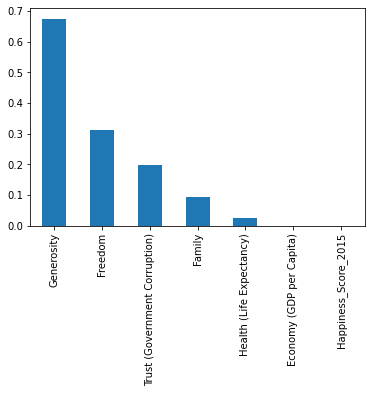

In [91]:
#In order to select the features that are most meaningful to our datasets, we'll run a chi-squared test.
#The smallest the values of the features, the more important they are.
from sklearn.feature_selection import chi2
chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns) 
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar() #we plot it
#We see that Generosity and Freeedom are not as meaningful.

In [92]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

[0.50486229 0.1174235  0.0899252  0.13952484 0.05569885 0.05365244
 0.03891288]


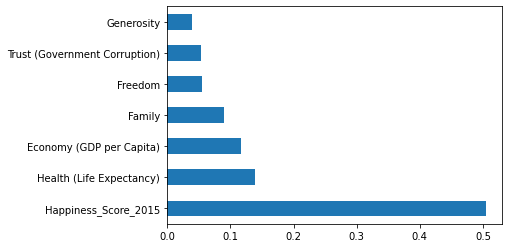

In [93]:
#In order to validate the above results, we also run one of the built-in sklearn feature selection modules,
#from ExtraTreesClassifier. Unlike the previous one, we expect our most important features to actually score
#higher than the rest.
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh') #we plot it.
plt.show()
#We get again the same results as the previous test.

In [94]:
#We drop the not so meaningful columns. 
X = X.drop(columns=['Trust (Government Corruption)','Freedom','Generosity']) 
X.shape

X.columns
#Now we have 4 predictor features.

Index(['Happiness_Score_2015', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)'],
      dtype='object')

In [98]:
X.head()

,Happiness_Score_2015,Economy (GDP per Capita),Family,Health (Life Expectancy)
0,2,1.39651,1.34951,0.94143
1,2,1.30232,1.40223,0.94784
2,2,1.32548,1.36058,0.87464
3,2,1.45900,1.33095,0.88521
4,2,1.32629,1.32261,0.90563


In [99]:
#We split into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True, random_state=42, stratify=y)
print(np.bincount(y_train))
print(np.bincount(y_test))


[39 34 32]
[17 15 14]


# Trying out different algorithms #

## Perceptron


{'perceptron__eta0': 1.0, 'perceptron__max_iter': 50}
              precision    recall  f1-score   support

           0       1.00      0.76      0.87        17
           1       0.74      0.93      0.82        15
           2       0.93      0.93      0.93        14

    accuracy                           0.87        46
   macro avg       0.89      0.88      0.87        46
weighted avg       0.89      0.87      0.87        46



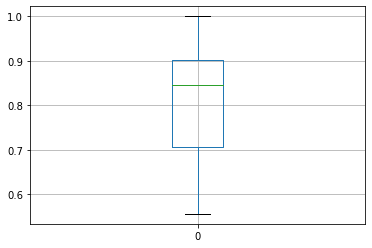

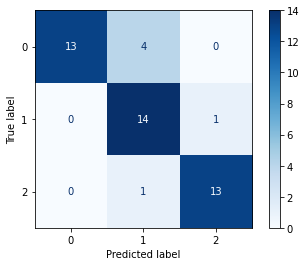

In [113]:
#We create a pipeline containing stardard scaling and the algorithm.
from sklearn.linear_model import Perceptron
perc_pipeline= make_pipeline(StandardScaler(), Perceptron())
perc_pipeline.get_params()
param_grid = [{'perceptron__eta0': [0.001,0.01, 0.05,0.1, 1.0], #run a gridsearch
               'perceptron__max_iter': [50,100,200,1000]}]

gs = GridSearchCV(estimator=perc_pipeline, param_grid=param_grid, scoring='accuracy', cv=10, refit=True) #refit with the best model
gs = gs.fit(X_train, y_train)
print(gs.best_params_) #print the best params according to the gridsearch
perc = gs.best_estimator_.predict(X_test) #assign the best model predictions to a variable
print(classification_report(y_test,perc)) #print classification report
scores = cross_val_score(estimator=gs, X=X_train, y=y_train, cv=10, scoring='f1_macro') #print cross validation score
pd.DataFrame(scores).boxplot() #plot the cross validation accuracy score
plot_confusion_matrix(gs, X_test, y_test, labels=gs.classes_, cmap='Blues') #plot the confusion matrix
plt.show()


## Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression
#We create a pipeline containing stardard scaling and the algorithm.
lr_pipe = make_pipeline(StandardScaler(), LogisticRegression())
lr_pipe.get_params() #we print the parameters' names

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression', LogisticRegression())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': None,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False}

{'logisticregression__C': 10.0, 'logisticregression__solver': 'lbfgs', 'logisticregression__tol': 0.0001}
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.79      1.00      0.88        15
           2       1.00      0.79      0.88        14

    accuracy                           0.91        46
   macro avg       0.93      0.91      0.91        46
weighted avg       0.93      0.91      0.91        46



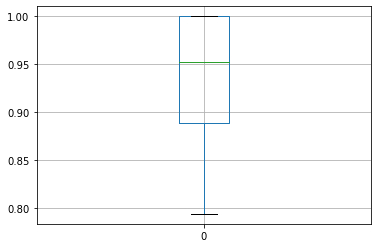

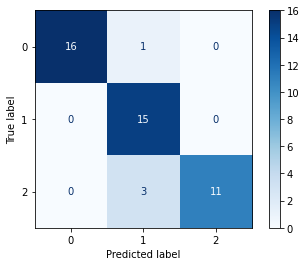

In [117]:
param_grid = [{'logisticregression__C': [0.01, 0.1, 1.0, 10.0, 100.0],
               'logisticregression__solver': ['liblinear'],
                'logisticregression__tol': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
             {'logisticregression__C': [0.01, 0.1, 1.0, 10.0, 100.0],
               'logisticregression__tol' : [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0], #run a gridsearch
               'logisticregression__solver': ['lbfgs']}]

gs = GridSearchCV(estimator=lr_pipe, param_grid=param_grid, scoring='accuracy', cv=10, refit=True)#refit with the best model
gs = gs.fit(X_train, y_train)
print(gs.best_params_) #print the best params according to the gridsearch
lr = gs.best_estimator_.predict(X_test) #assign the best model predictions to a variable
print(classification_report(y_test,lr)) #print classification report
scores = cross_val_score(estimator=gs, X=X_train, y=y_train, cv=10, scoring='f1_macro')#print cross validation score
pd.DataFrame(scores).boxplot() #print the boxplot of the cross val accuracy scores
plot_confusion_matrix(gs, X_test, y_test, labels=gs.classes_, cmap='Blues')#plot the confusion matrix
plt.show()

## Decision Trees

In [123]:
from sklearn.tree import DecisionTreeClassifier
#We create a pipeline containing stardard scaling and the algorithm.
from sklearn import tree 
tree_pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier())
print(tree_pipe.get_params()) #we print the parameters' names
fittedtree = tree_pipe.fit(X_train,y_train)

{'memory': None, 'steps': [('standardscaler', StandardScaler()), ('decisiontreeclassifier', DecisionTreeClassifier())], 'verbose': False, 'standardscaler': StandardScaler(), 'decisiontreeclassifier': DecisionTreeClassifier(), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'decisiontreeclassifier__ccp_alpha': 0.0, 'decisiontreeclassifier__class_weight': None, 'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__max_features': None, 'decisiontreeclassifier__max_leaf_nodes': None, 'decisiontreeclassifier__min_impurity_decrease': 0.0, 'decisiontreeclassifier__min_impurity_split': None, 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_samples_split': 2, 'decisiontreeclassifier__min_weight_fraction_leaf': 0.0, 'decisiontreeclassifier__presort': 'deprecated', 'decisiontreeclassifier__random_state': None, 'decisiontreeclassifier__splitter': 'best'}


{'kneighborsclassifier__n_neighbors': 5}
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       0.93      0.93      0.93        15
           2       1.00      0.93      0.96        14

    accuracy                           0.96        46
   macro avg       0.96      0.95      0.96        46
weighted avg       0.96      0.96      0.96        46



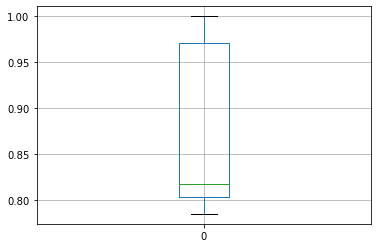

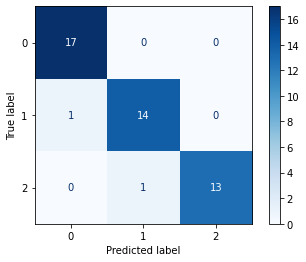

In [133]:
param_grid = [{'decisiontreeclassifier__max_depth': [2,3,4,5,6],
               'decisiontreeclassifier__criterion': ['gini', 'entropy']}] #run a gridsearch

ts = GridSearchCV(estimator=tree_pipe, param_grid=param_grid, scoring='accuracy', cv=10, refit=True)#refit with the best model
ts.fit(X_train, y_train)
print(gs.best_params_) #print the best params according to the gridsearch
mytree = ts.best_estimator_.predict(X_test) #assign the best model predictions to a variable
print(classification_report(y_test,mytree)) #print classification report
scores = cross_val_score(estimator=ts, X=X_train, y=y_train, cv=10, scoring='f1_macro') #print cross validation score
pd.DataFrame(scores).boxplot() #print the boxplot of the cross val accuracy scores
plot_confusion_matrix(ts, X_test, y_test, labels=gs.classes_, cmap='Blues')#plot the confusion matrix
plt.show()

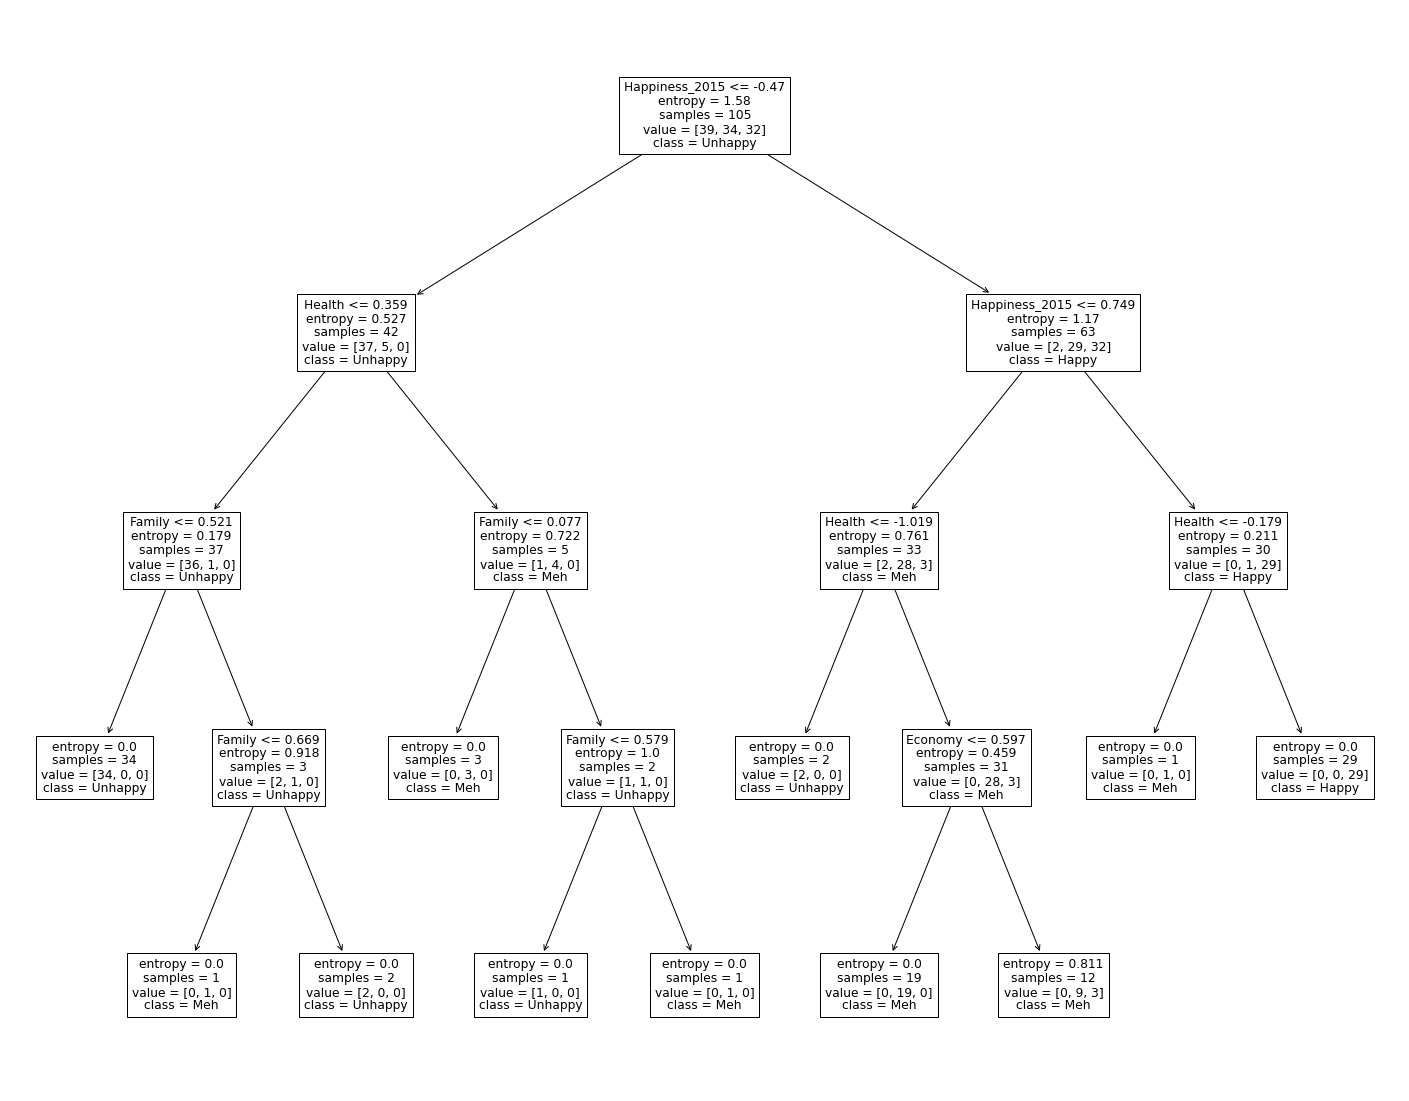

In [127]:
#It didn't let me plot the decision tree with the pipeline, so I recreated the pipeline manually.
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42) 
scaler = StandardScaler() # scale the feature values in such a way that mean is 0 and sd is 1
scaler.fit(X_train)
X_train_std = scaler.transform(X_train) 
X_test_std = scaler.transform(X_test)
dt.fit(X_train_std, y_train) #fitting the model with our scaled data

plt.figure(figsize=(25,20))
tree.plot_tree(dt,feature_names=['Happiness_2015','Economy','Family','Health',],class_names = ['Unhappy', 'Meh', 'Happy'])
plt.show() #plotting the tree

## K-Nearest Neighbors


{'kneighborsclassifier__n_neighbors': 5}
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.88      0.93      0.90        15
           2       1.00      0.93      0.96        14

    accuracy                           0.93        46
   macro avg       0.94      0.93      0.94        46
weighted avg       0.94      0.93      0.94        46



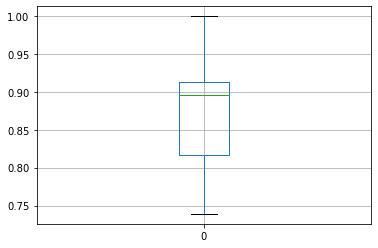

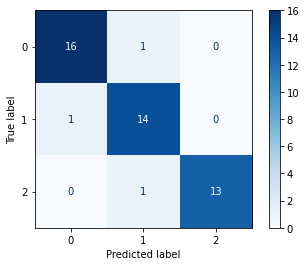

In [132]:
from sklearn.neighbors import KNeighborsClassifier
#We create a pipeline containing stardard scaling and the algorithm.
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
knn_pipe.get_params() #we print the parameters' names
param_grid = [{'kneighborsclassifier__n_neighbors': [1,2,3,4,5,6]}] #run a gridsearch
gs = GridSearchCV(estimator=knn_pipe, param_grid=param_grid, scoring='accuracy', cv=10, refit=True) #refit with the best model
gs.fit(X_train, y_train)
print(gs.best_params_) #print the best params according to the gridsearch
knn_pred = gs.best_estimator_.predict(X_test) #assign the best model predictions to a variable
print(classification_report(y_test,knn_pred)) #print classification report
scores = cross_val_score(estimator=gs, X=X_train, y=y_train, cv=10, scoring='f1_macro') #print cross validation score
pd.DataFrame(scores).boxplot() #print the boxplot of the cross val accuracy scores
plot_confusion_matrix(gs, X_test, y_test, labels=gs.classes_, cmap='Blues') #plot the confusion matrix
plt.show()


## SVM


In [107]:
from sklearn.svm import SVC

In [108]:
svc = make_pipeline(StandardScaler(), SVC())
#We create a pipeline containing stardard scaling and the algorithm.
svc.get_params() #we print the parameters' names


{'memory': None,
 'steps': [('standardscaler', StandardScaler()), ('svc', SVC())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'svc': SVC(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

{'svc__C': 1.0, 'svc__gamma': 0.01, 'svc__kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.88      0.93      0.90        15
           2       1.00      0.93      0.96        14

    accuracy                           0.93        46
   macro avg       0.94      0.93      0.94        46
weighted avg       0.94      0.93      0.94        46



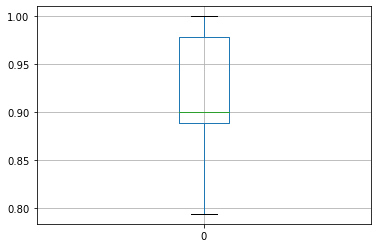

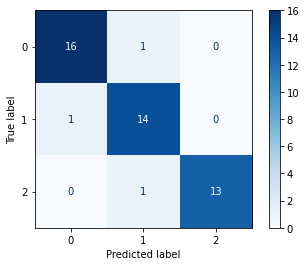

In [134]:
param_grid = [{'svc__gamma': [0.01, 0.1, 0.5, 1.0, 10.0, 50.0, 100.0, 1000.0],
              'svc__C' : [0.01, 0.1, 1.0, 10.0, 20.0],
               'svc__kernel': ['linear']},
              {'svc__gamma': [0.01, 0.1, 0.5, 1.0, 10.0, 50.0, 100.0, 1000.0], #run a gridsearch
              'svc__C' : [0.01, 0.1, 1.0, 10.0, 20.0],
               'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=10, refit=True) #refit with the best model
gs.fit(X_train, y_train) #fit the grid search to our data
print(gs.best_params_) #print the best params according to the gridsearch
svm_pred = gs.best_estimator_.predict(X_test) #assign the best model predictions to a variable
print(classification_report(y_test,svm_pred)) #print classification report
scores = cross_val_score(estimator=gs, X=X_train, y=y_train, cv=10, scoring='f1_macro') #print cross validation score
pd.DataFrame(scores).boxplot() #print the boxplot of the cross val accuracy scores
plot_confusion_matrix(gs, X_test, y_test, labels=gs.classes_, cmap='Blues')#plot the confusion matrix
plt.show()

## SGD Classifier ##

In [110]:
from sklearn.linear_model import SGDClassifier

In [137]:
sgd = make_pipeline(StandardScaler(), SGDClassifier())
#We create a pipeline containing stardard scaling and the algorithm.
sgd.get_params() #we print the parameters' names

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('sgdclassifier', SGDClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'sgdclassifier': SGDClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'sgdclassifier__alpha': 0.0001,
 'sgdclassifier__average': False,
 'sgdclassifier__class_weight': None,
 'sgdclassifier__early_stopping': False,
 'sgdclassifier__epsilon': 0.1,
 'sgdclassifier__eta0': 0.0,
 'sgdclassifier__fit_intercept': True,
 'sgdclassifier__l1_ratio': 0.15,
 'sgdclassifier__learning_rate': 'optimal',
 'sgdclassifier__loss': 'hinge',
 'sgdclassifier__max_iter': 1000,
 'sgdclassifier__n_iter_no_change': 5,
 'sgdclassifier__n_jobs': None,
 'sgdclassifier__penalty': 'l2',
 'sgdclassifier__power_t': 0.5,
 'sgdclassifier__random_state': None,
 'sgdclassifier__shuffle': True,
 'sgdclassifier__tol': 0.001,
 'sgdclassifier__validation_fraction': 0.1,
 'sgdclassifier__verbose': 0,


{'sgdclassifier__alpha': 0.01, 'sgdclassifier__loss': 'log', 'sgdclassifier__penalty': 'l1'}
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.88      1.00      0.94        15
           2       1.00      0.93      0.96        14

    accuracy                           0.96        46
   macro avg       0.96      0.96      0.96        46
weighted avg       0.96      0.96      0.96        46



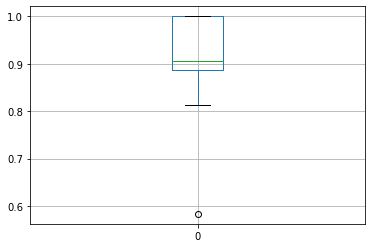

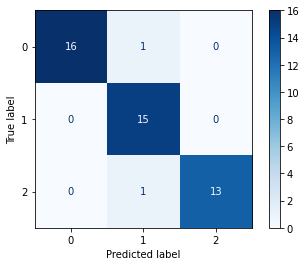

In [139]:
params = [{'sgdclassifier__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0],
           'sgdclassifier__loss': ['perceptron', 'hinge', 'log'],
           'sgdclassifier__penalty': ['l2', 'l1', 'elasticnet']}] #run a gridsearch
gs = GridSearchCV(estimator=sgd, param_grid=params, scoring='f1_macro', cv=10, n_jobs=-1, refit=True) #refit with the best model
gs.fit(X_train, y_train)
print(gs.best_params_) #print the best params according to the gridsearch
sgd_pred = gs.best_estimator_.predict(X_test) #assign the best model predictions to a variable
print(classification_report(y_test,sgd_pred)) #print classification report
scores = cross_val_score(estimator=gs, X=X_train, y=y_train, cv=10, scoring='f1_macro') #print cross validation score
pd.DataFrame(scores).boxplot() #print the boxplot of the cross val accuracy scores
plot_confusion_matrix(gs, X_test, y_test, labels=gs.classes_, cmap='Blues')#plot the confusion matrix
plt.show()